In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [2]:
from zipfile import ZipFile
 
data_path = r'C:\Users\91897\Desktop\major project\lung-and-colon-cancer-histopathological-images.zip.zip'

 
with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')


The data set has been extracted.


In [3]:
path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes

['lung_aca', 'lung_n', 'lung_scc']

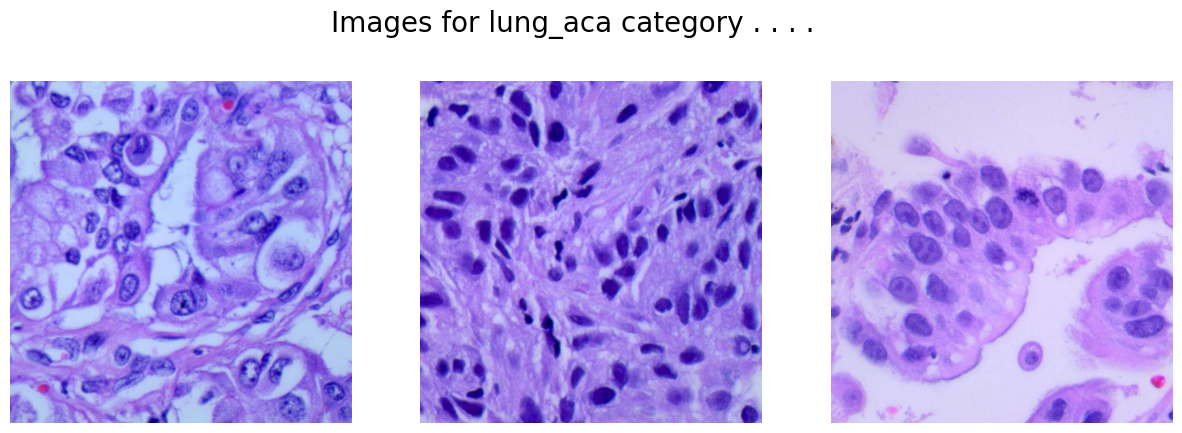

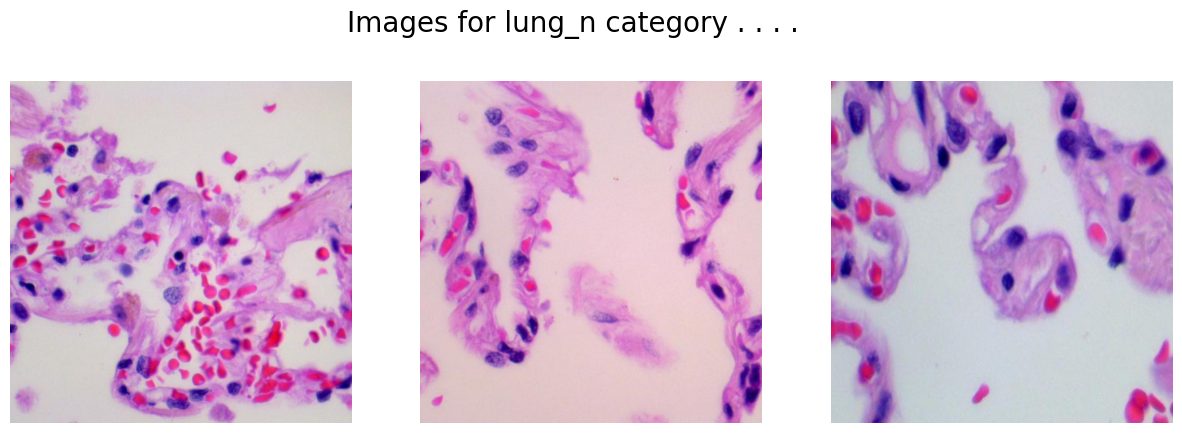

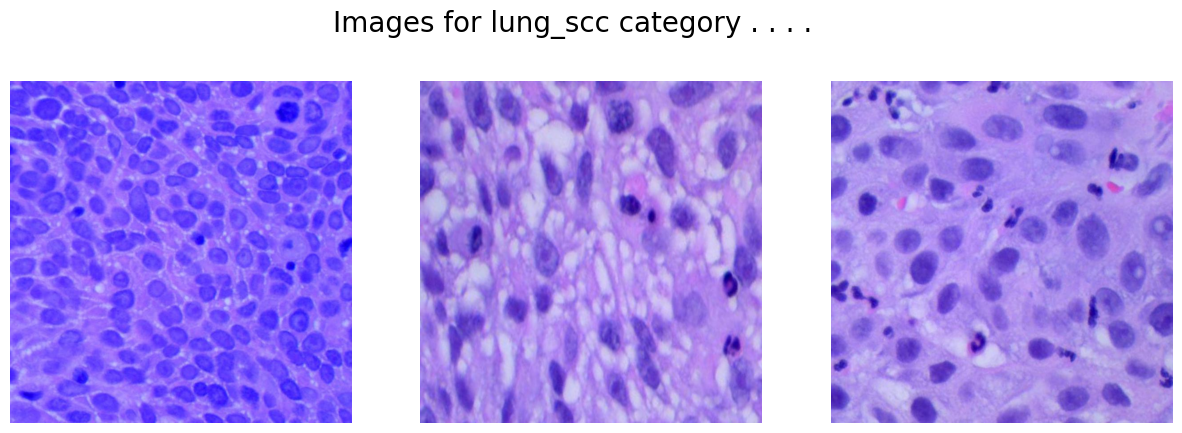

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the base path for the image sets
path = r'C:\Users\91897\Desktop\major project\lung_colon_image_set\lung_image_sets'

# List the categories (subdirectories)
classes = os.listdir(path)

for cat in classes:
    # Construct the full path to the category directory
    image_dir = os.path.join(path, cat)
    
    # List all files in the category directory
    images = os.listdir(image_dir)
    
    # Create a figure with subplots to display images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))  # Pick a random image
        img_file = images[k]
        img_path = os.path.join(image_dir, img_file)
        
        # Check if the file path is valid and is a file
        if os.path.isfile(img_path):
            try:
                # Open and display the image
                img = np.array(Image.open(img_path))
                ax[i].imshow(img)
                ax[i].axis('off')
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
        else:
            print(f"Skipped non-file item: {img_path}")

    plt.show()


In [5]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 64


In [7]:
import cv2
import numpy as np
import pandas as pd
from glob import glob



# Lists to store images and labels
X = []
Y = []

# Define the path and categories
path = r'C:\Users\91897\Desktop\major project\lung_colon_image_set\lung_image_sets'
classes = os.listdir(path)

for i, cat in enumerate(classes):
    image_dir = os.path.join(path, cat)
    images = glob(os.path.join(image_dir, '*.jpeg'))

    for image in images:
        img = cv2.imread(image)
        if img is not None:
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img_resized)
            Y.append(i)

# Convert lists to numpy arrays
X = np.asarray(X)
Y = np.asarray(Y)

# Perform one-hot encoding on the labels
one_hot_encoded_Y = pd.get_dummies(Y).values



In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y,
												test_size = SPLIT,
												random_state = 2022)
print(X_train.shape, X_val.shape)


(12000, 256, 256, 3) (3000, 256, 256, 3)


In [9]:
model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(3, activation='softmax')
])


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

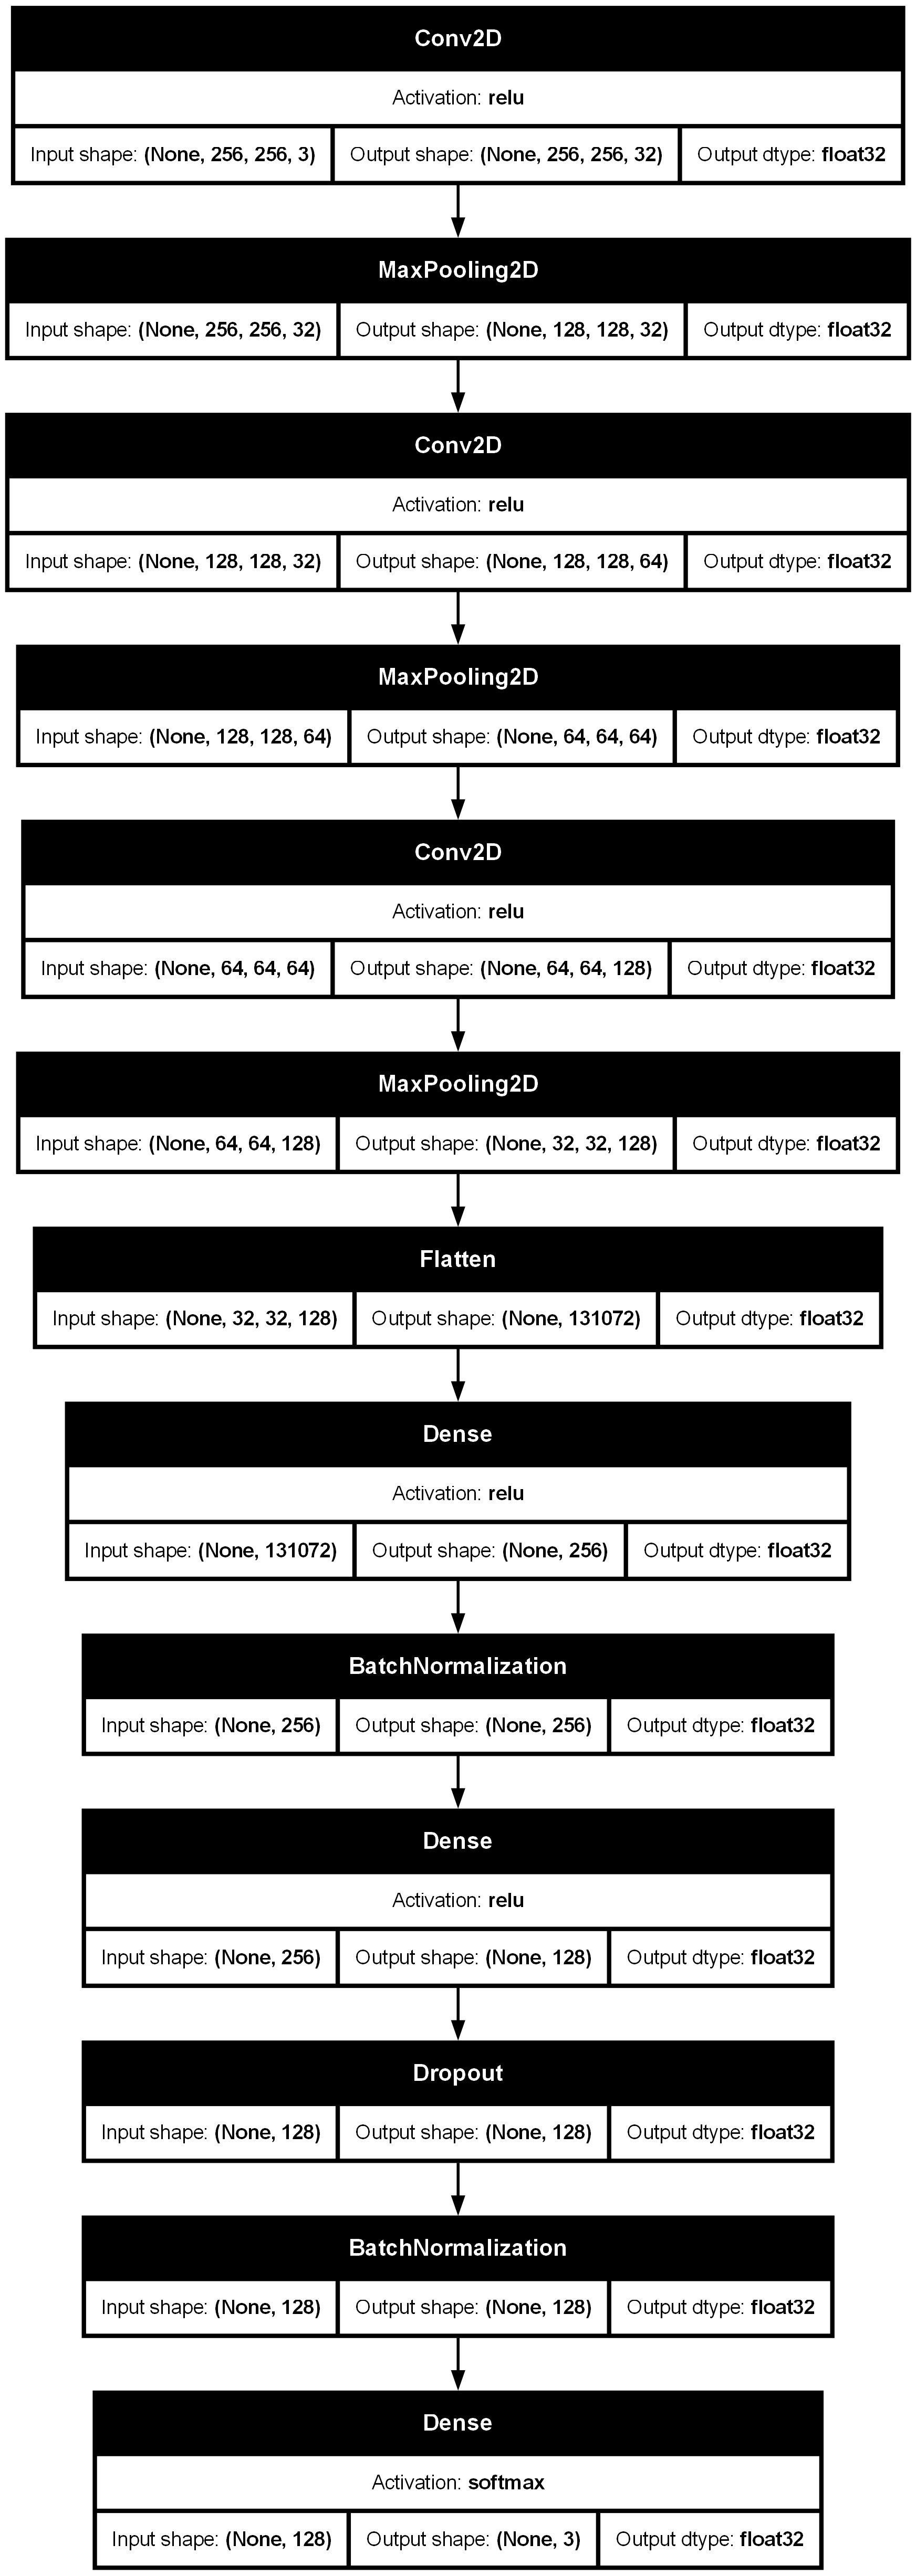

In [12]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [11]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)


In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.3412 - loss: 20.5630 - val_accuracy: 0.1500 - val_loss: 28.0979 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2797 - loss: 22.3879 - val_accuracy: 0.4000 - val_loss: 1.5343 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5064 - loss: 3.4612 - val_accuracy: 0.4500 - val_loss: 2.0968 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4574 - loss: 2.4007 - val_accuracy: 0.4000 - val_loss: 3.1340 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6119 - loss: 1.2467 - val_accuracy: 0.3000 - val_loss: 1.1822 - learning_rate: 5.0000e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7587 - loss: 0.6135 - val_accuracy: 0.4000 - val_loss: 1.1068 - learning_rate: 5.0000e-04
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7321 - loss: 0.6054 - val

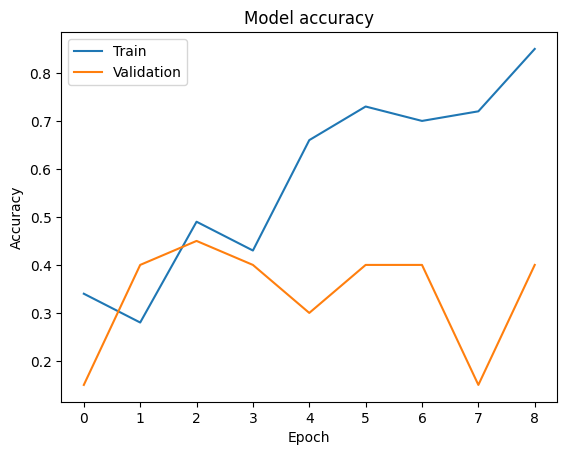

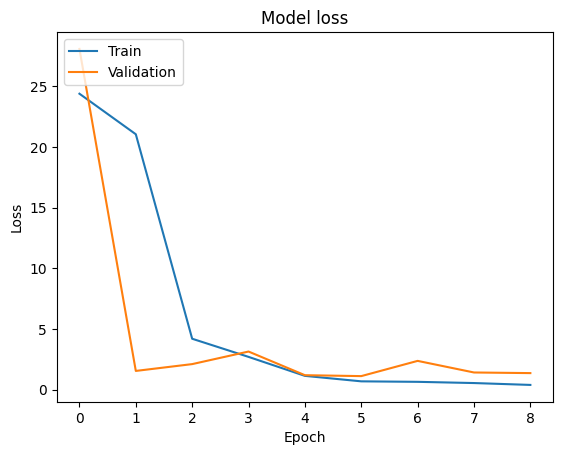

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Example data (ensure X_train is (num_samples, 256, 256, 3) and Y_train is categorical)
# Replace with actual data
X_train = np.random.rand(100, 256, 256, 3)  # Example: 100 samples, 256x256 RGB images
X_val = np.random.rand(20, 256, 256, 3)     # Example: 20 validation samples
Y_train = np.random.randint(3, size=100)     # Example: 100 training labels (3 classes)
Y_val = np.random.randint(3, size=20)        # Example: 20 validation labels

# Convert labels to categorical (one-hot encoded)
Y_train = to_categorical(Y_train, num_classes=3)
Y_val = to_categorical(Y_val, num_classes=3)

# Model definition
model = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Flatten the 256x256x3 images to 1D vector
    Dense(64, activation='relu', name='dense_1'),
    Dense(32, activation='relu', name='dense_2'),
    Dense(3, activation='softmax', name='output_layer')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Set parameters
BATCH_SIZE = 32
EPOCHS = 50

# Train the model
history = model.fit(
    X_train, 
    Y_train,
    validation_data=(X_val, Y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[es, lr]  # List of callbacks
)

# Plot training & validation accuracy values (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values (optional)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




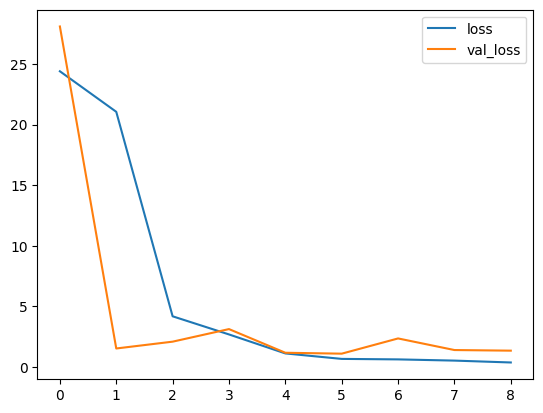

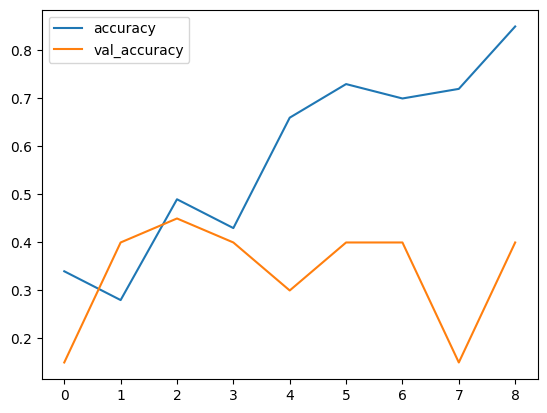

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()


In [15]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [16]:
metrics.confusion_matrix(Y_val, Y_pred)


array([[0, 0, 9],
       [0, 0, 3],
       [0, 0, 8]], dtype=int64)

In [17]:
print(metrics.classification_report(Y_val, Y_pred,
									target_names=classes))


              precision    recall  f1-score   support

    lung_aca       0.00      0.00      0.00         9
      lung_n       0.00      0.00      0.00         3
    lung_scc       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.13      0.33      0.19        20
weighted avg       0.16      0.40      0.23        20

